## Looking at gradient of objective functions using quiver plots

### DISCRETE Case where C=I and A diagonal

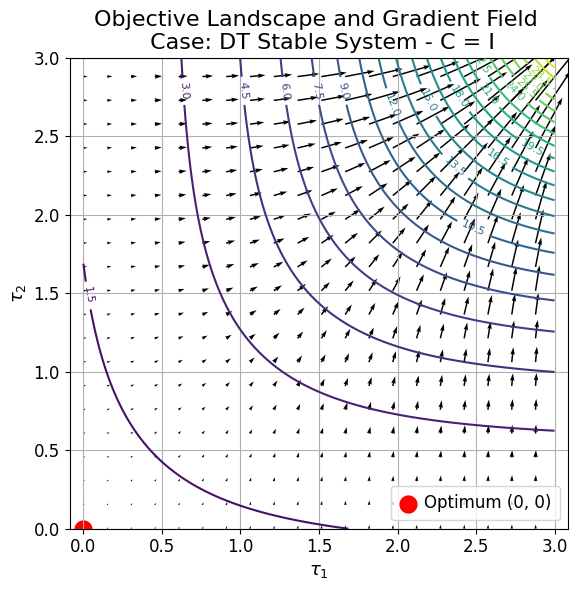

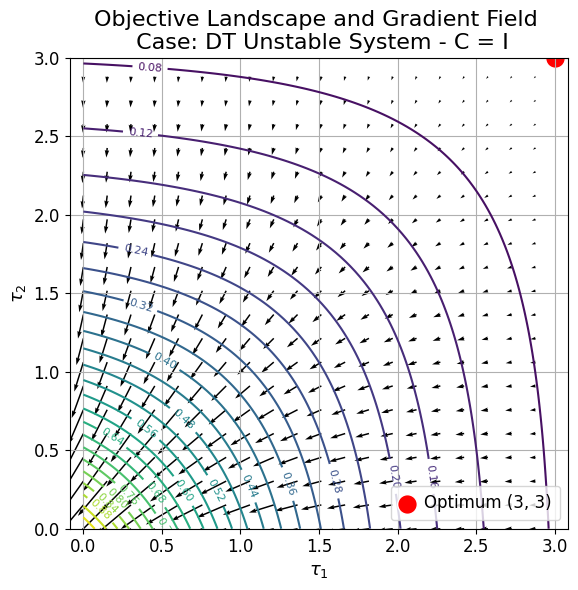

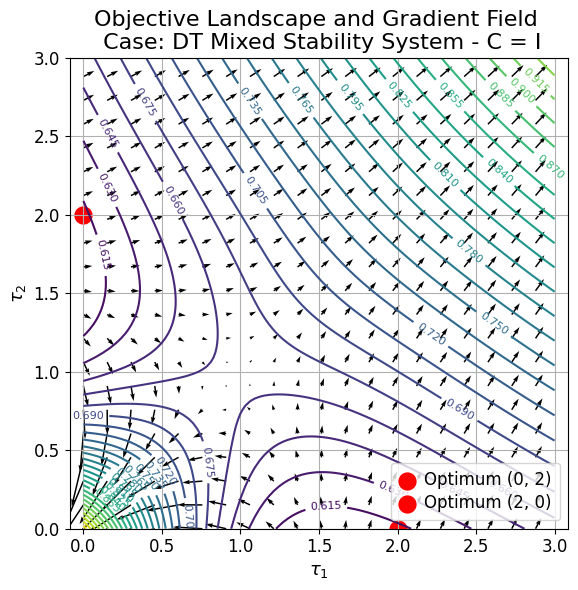

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def f(tau1, tau2, a11, a22):
    return 1 / (a11**(2 * tau1) + a11**(2 * tau2)) + 1 / (a22**(2 * tau1) + a22**(2 * tau2))


def grad_f(tau1, tau2, a11, a22):
    grad_tau1 = - ((2 * a11**(2 * tau1) * np.log(a11)) / (a11**(2 * tau1) + a11**(2 * tau2))**2 
                   + (2 * a22**(2 * tau1) * np.log(a22)) / (a22**(2 * tau1) + a22**(2 * tau2))**2)
    grad_tau2 = - ((2 * a11**(2 * tau2) * np.log(a11)) / (a11**(2 * tau1) + a11**(2 * tau2))**2 
                   + (2 * a22**(2 * tau2) * np.log(a22)) / (a22**(2 * tau1) + a22**(2 * tau2))**2)
    return grad_tau1, grad_tau2

# Find minimum using grid search
def find_minimum(tau_min, tau_max, a11, a22, resolution=50):
    best_solutions=[]
    best_value=np.inf
    for tau1 in range(tau_min, tau_max + 1):
        for tau2 in range(tau_min, tau_max + 1):
            obj_value = f(tau1, tau2, a11, a22)
            
            if obj_value < best_value:
                best_value = obj_value

    for tau1 in range(tau_min, tau_max + 1):
        for tau2 in range(tau_min, tau_max + 1):
            obj_value = f(tau1, tau2, a11, a22)
            
            if obj_value == best_value:
                best_solutions.append((tau1, tau2))
    return best_solutions

def create_quiver_plot(tau_min, tau_max, a11, a22, C_label="C = I"):
    # Generate Grid
    tau1_range = np.linspace(tau_min, tau_max, 100)
    tau2_range = np.linspace(tau_min, tau_max, 100)
    tau1, tau2 = np.meshgrid(tau1_range, tau2_range)

    # Compute function and gradients
    f_vals = f(tau1, tau2, a11, a22)
    U, V = grad_f(tau1, tau2, a11, a22)
    grad_norm = np.sqrt(U**2 + V**2)

    # Find minimum from discrete search
    best_values = find_minimum(tau_min, tau_max, a11, a22)

    # Plot contour of the objective function
    plt.figure(figsize=(6, 6))
    contour_levels = 30
    contours = plt.contour(tau1, tau2, f_vals, levels=contour_levels, cmap="viridis")
    plt.clabel(contours, inline=True, fontsize=8)

    # Plot the norm of the gradient — where gradient is close to 0
    # zero_grad_threshold = 1e-3
    # plt.contour(tau1, tau2, grad_norm, levels=[zero_grad_threshold], colors='green', linestyles='dashed', linewidths=2)

    # Quiver plot
    skip = (slice(None, None, 5), slice(None, None, 5))
    plt.quiver(tau1[skip], tau2[skip], U[skip], V[skip], color='black', alpha=1.0)

    # Plot optimal points
    for i, (opt_tau1, opt_tau2) in enumerate(best_values):
        label = f"Optimum ({opt_tau1}, {opt_tau2})"
        plt.scatter(opt_tau1, opt_tau2, color='red', s=200, edgecolors='white', label=label)

   
    plt.xlabel(r"$\tau_1$", fontsize=13)
    plt.ylabel(r"$\tau_2$", fontsize=13)
    plt.title(f"Objective Landscape and Gradient Field \n Case: {C_label}", fontsize=16)
    plt.legend(
    loc='lower right',  
    fontsize=12,         
    frameon=True,       
    handlelength=1,     
    handletextpad=0.5,  
    borderpad=0.5,      
    labelspacing=0.3   
)
    plt.tick_params(axis='both', which='major', labelsize=12)
    plt.grid(True)
    plt.axis('equal')
    plt.tight_layout()

    plt.savefig('../plots/'+ C_label + '.pdf')
    plt.show()



a11, a22 = 0.5, 0.9
tau_min, tau_max = 0, 3
create_quiver_plot(tau_min, tau_max, a11, a22, C_label="DT Stable System - C = I")


a11, a22 = 1.6, 1.9
tau_min, tau_max = 0, 3
create_quiver_plot(tau_min, tau_max, a11, a22, C_label="DT Unstable System - C = I")

a11, a22 = 3.3, 0.9
tau_min, tau_max = 0, 3
create_quiver_plot(tau_min, tau_max, a11, a22, C_label="DT Mixed Stability System - C = I")

### CONTINUOUS Case where C=I and A diagonal

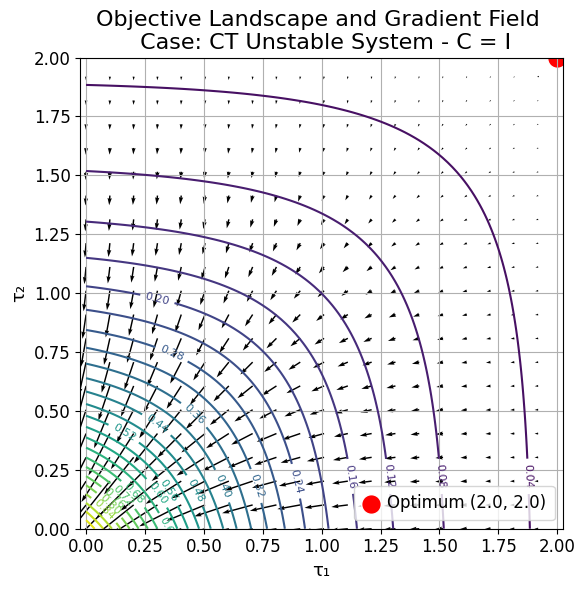

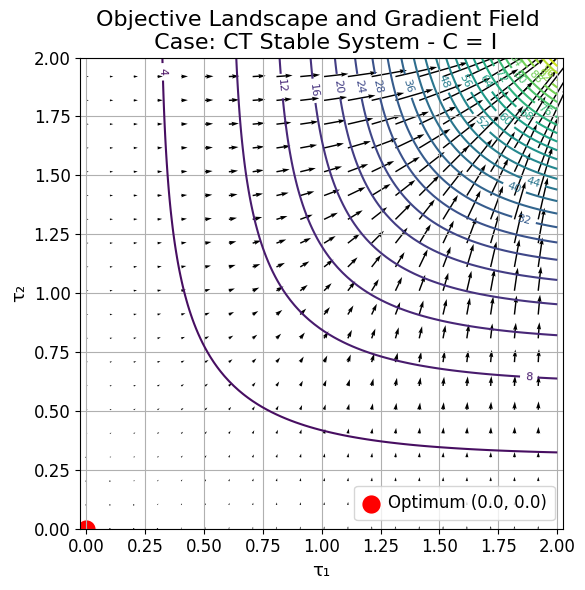

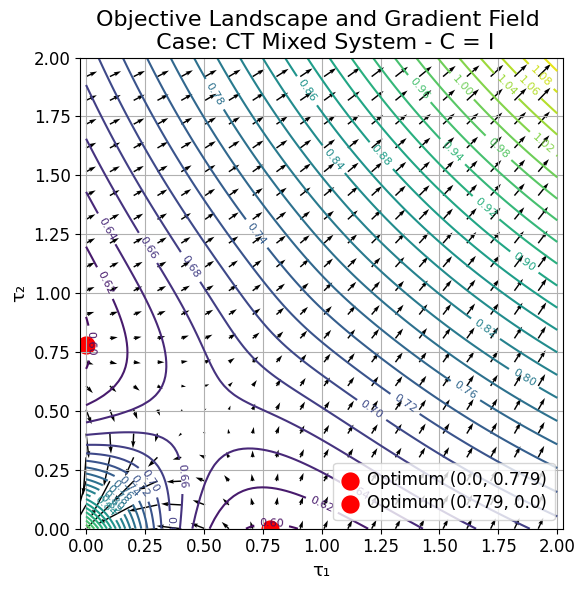

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from math import exp

def f(tau1, tau2, a11, a22):
    return 1/(np.exp(a11*2*tau1) + np.exp(a11*2*tau2)) + 1/(np.exp(a22*2*tau1) + np.exp(a22*2*tau2))

# Compute gradient
def grad_f(tau1, tau2, a11, a22):
    t1= (2 * a11 * np.exp(a11*2*tau1))/ (np.exp(a11*2*tau1) + np.exp(a11*2*tau2))**2
    t2= (2 * a22 * np.exp(a22*2*tau1))/ (np.exp(a22*2*tau1) + np.exp(a22*2*tau2))**2
    grad_tau1 = - (t1 + t2)

    t1= (2 * a11 * np.exp(a11*2*tau2))/ (np.exp(a11*2*tau1) + np.exp(a11*2*tau2))**2
    t2= (2 * a22 * np.exp(a22*2*tau2))/ (np.exp(a22*2*tau1) + np.exp(a22*2*tau2))**2
    grad_tau2 = - (t1 + t2)


    return grad_tau1, grad_tau2


# Find minimum using grid search
def find_minimum(tau_min, tau_max, a11, a22, resolution=50):
    best_solutions=[]
    best_value=np.inf

    tau1_vals= np.linspace(tau_min,tau_max,1000)
    tau2_vals= np.linspace(tau_min,tau_max,1000) 

    for tau1 in tau1_vals:
        for tau2 in tau2_vals:
            obj_value = f(tau1, tau2, a11, a22)
            
            if obj_value < best_value:
                best_value = obj_value

    for tau1 in tau1_vals:
        for tau2 in tau2_vals:
            obj_value = f(tau1, tau2, a11, a22)
            
            if obj_value == best_value:
                best_solutions.append((tau1, tau2))
    return best_solutions

def create_quiver_plot(tau_min, tau_max, a11, a22, C_label="C = I"):
    # Generate gird
    tau1_range = np.linspace(tau_min, tau_max, 100)
    tau2_range = np.linspace(tau_min, tau_max, 100)
    tau1, tau2 = np.meshgrid(tau1_range, tau2_range)

    # Compute function and gradients
    f_vals = f(tau1, tau2, a11, a22)
    U, V = grad_f(tau1, tau2, a11, a22)
    grad_norm = np.sqrt(U**2 + V**2)

    # Find minimum from discrete search
    best_values = find_minimum(tau_min, tau_max, a11, a22)

    # Plot contour of the objective function
    plt.figure(figsize=(6, 6))
    contour_levels = 30
    contours = plt.contour(tau1, tau2, f_vals, levels=contour_levels, cmap="viridis")
    plt.clabel(contours, inline=True, fontsize=8)

    # Plot the norm of the gradient — where gradient is close to 0
    # zero_grad_threshold = 1e-3
    # grad_contour = plt.contour(
    #     tau1, tau2, grad_norm,
    #     levels=[zero_grad_threshold],
    #     colors='green',
    #     linestyles='dashed',
    #     linewidths=2
    # )
    # Dummy label for green dashed line (included only once)
    # grad_proxy = plt.Line2D([], [], color='green', linestyle='dashed', label='‖∇f‖ ≈ 0')
    grad_proxy = plt.Line2D([], [], color='green', linestyle='dashed')

    # Quiver plot
    skip = (slice(None, None, 5), slice(None, None, 5))
    quiver = plt.quiver(tau1[skip], tau2[skip], U[skip], V[skip], color='black', alpha=1)
    # quiver_proxy = plt.Line2D([], [], color='red', marker=r'$\rightarrow$', linestyle='None', label='−∇f')
    quiver_proxy = plt.Line2D([], [], color='red', marker=r'$\rightarrow$', linestyle='None')

    # Plot optimal solutions
    optima_handles = []
    for i, (opt_tau1, opt_tau2) in enumerate(best_values):
        handle = plt.scatter(
            opt_tau1, opt_tau2,
            color='red', s=200, edgecolors='white',
            label = f"Optimum ({round(opt_tau1, 3)}, {round(opt_tau2, 3)})"
        )
        optima_handles.append(handle)


    plt.xlabel("τ₁", fontsize=13)
    plt.ylabel("τ₂", fontsize=13)
    plt.title(f"Objective Landscape and Gradient Field \n Case: {C_label}", fontsize=16)
    

    handles, labels = plt.gca().get_legend_handles_labels()
    handles.extend([grad_proxy, quiver_proxy])

    plt.legend(
    loc='lower right',  
    fontsize=12,         
    frameon=True,       
    handlelength=1,     
    handletextpad=0.5,  
    borderpad=0.5,      
    labelspacing=0.3    
)

    plt.tick_params(axis='both', which='major', labelsize=12)
    plt.grid(True)
    plt.axis('equal')
    plt.tight_layout()
    plt.savefig('../plots/'+ C_label + '.pdf')
    plt.show()



#Different cases
a11, a22 = 0.9, 1.3
tau_min, tau_max = 0, 2
create_quiver_plot(tau_min, tau_max, a11, a22, C_label="CT Unstable System - C = I")

a11, a22 = -0.9, -1.3
tau_min, tau_max = 0, 2
create_quiver_plot(tau_min, tau_max, a11, a22,  C_label="CT Stable System - C = I")

a11, a22 = -0.2, 2.5
tau_min, tau_max = 0, 2
create_quiver_plot(tau_min, tau_max, a11, a22,  C_label="CT Mixed System - C = I")


### Case whereC=[1 1] and A diagonal

C:\Users\MaryJoElBared\AppData\Local\Temp\ipykernel_33216\1069138143.py:9: RuntimeWarning: divide by zero encountered in divide
  result = np.where(np.abs(a11 - a22) < 0.1, np.inf, num / denum)  # Mask near singularity
C:\Users\MaryJoElBared\AppData\Local\Temp\ipykernel_33216\1069138143.py:97: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(tau1, tau2, grad_norm, levels=[0.00001], colors='green', linestyles='dashed', label='Gradient Norm = 0')


(array(1.00564104), array(-0.76203974))
(array(-0.76203974), array(1.00564104))


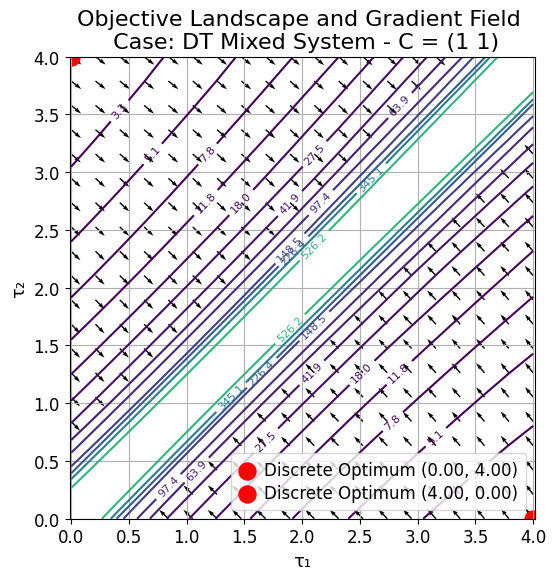

C:\Users\MaryJoElBared\AppData\Local\Temp\ipykernel_33216\1069138143.py:9: RuntimeWarning: divide by zero encountered in divide
  result = np.where(np.abs(a11 - a22) < 0.1, np.inf, num / denum)  # Mask near singularity
C:\Users\MaryJoElBared\AppData\Local\Temp\ipykernel_33216\1069138143.py:97: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(tau1, tau2, grad_norm, levels=[0.00001], colors='green', linestyles='dashed', label='Gradient Norm = 0')


(array(0.37647732), array(-1.77906722))
(array(-1.77906722), array(0.37647732))


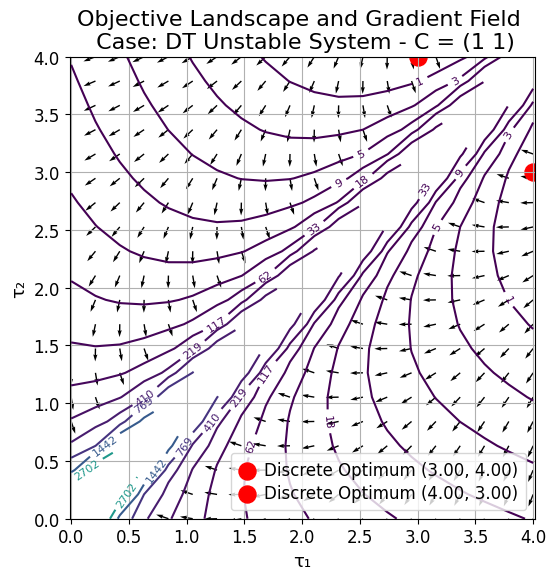

C:\Users\MaryJoElBared\AppData\Local\Temp\ipykernel_33216\1069138143.py:9: RuntimeWarning: divide by zero encountered in divide
  result = np.where(np.abs(a11 - a22) < 0.1, np.inf, num / denum)  # Mask near singularity
C:\Users\MaryJoElBared\AppData\Local\Temp\ipykernel_33216\1069138143.py:97: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(tau1, tau2, grad_norm, levels=[0.00001], colors='green', linestyles='dashed', label='Gradient Norm = 0')


(array(135.65871583), array(-22.63389422))
(array(-22.63389422), array(135.65871583))


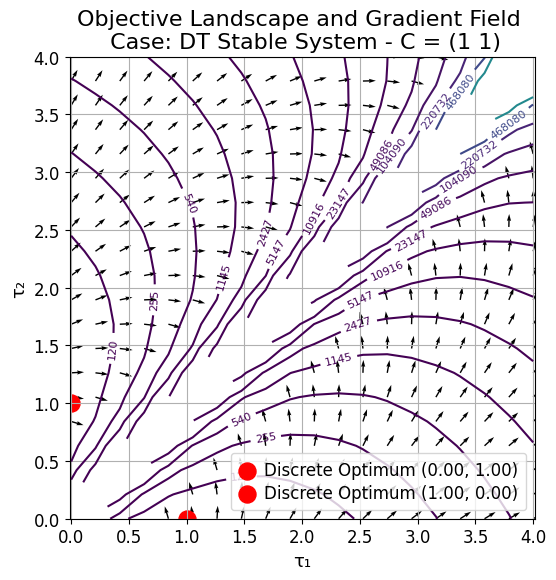

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def f(tau1, tau2, a11, a22):
    num=a11**(2 * tau1) + a11**(2 * tau2)+ a22**(2 * tau1) + a22**(2 * tau2)
    denum= a11**(2 * tau1)*a22**(2 * tau2) + a11**(2 * tau2)*a22**(2 * tau1) - 2*a11**(tau1 + tau2) * a22**(tau1 + tau2)
    

    result = np.where(np.abs(a11 - a22) < 0.1, np.inf, num / denum)  # Mask near singularity
    
    return result

# Compute gradient
def grad_f(tau1, tau2, a11, a22):
    #Tau1 component 
    tau1_term1 = 2 * a11**(tau1) * np.log(a11) * (a22**tau1 * a11**(tau1 + tau2) + a11**(2*tau2) * a22**tau2 + a22**(2*tau1 + tau2) + a22**(3*tau2))
    tau1_term2 = 2 * a22**(tau1) * np.log(a22) * (a11**tau1 * a22**(tau1 + tau2) + a22**(2*tau2) * a11**tau2 + a11**(2*tau1 + tau2) + a11**(3*tau2))

    num_tau1 = tau1_term1 - tau1_term2
    denum_tau1 = (a11**tau1 * a22**tau2 - a11**tau2 * a22**tau1)**3

    # Avoid division errors near tau1 = tau2
    with np.errstate(divide='ignore', invalid='ignore'):
        grad_tau1 = np.where(np.abs(tau1 - tau2) < 0.7, np.nan, -num_tau1 / denum_tau1)  # Mask near singularity

    #Tau2 component 
    tau2_term1 = 2 * a22**(tau2) * np.log(a22) * (a11**tau2 * a22**(tau1 + tau2) + a22**(2*tau1) * a11**tau1 + a11**(2*tau2 + tau1) + a11**(3*tau1))
    tau2_term2 = 2 * a11**(tau2) * np.log(a11) * (a22**tau2 * a11**(tau1 + tau2) + a11**(2*tau1) * a22**tau1 + a22**(2*tau2 + tau1) + a22**(3*tau1))

    num_tau2 = tau2_term1 - tau2_term2
    denum_tau2 = (a11**tau1 * a22**tau2 - a11**tau2 * a22**tau1)**3

    # Avoid division errors near tau1 = tau2
    with np.errstate(divide='ignore', invalid='ignore'):
        grad_tau2 = np.where(np.abs(tau1 - tau2) < 0.7, np.nan, -num_tau2 / denum_tau2)  # Mask near singularity
    return grad_tau1, grad_tau2

def find_minimum(tau_min, tau_max, a11, a22, resolution=50):
    best_solutions=[]
    best_value=np.inf
    for tau1 in range(tau_min, tau_max + 1):
        for tau2 in range(tau_min, tau_max + 1):
            if tau1==tau2:
                obj_value=np.inf
            else:
                obj_value = f(tau1, tau2, a11, a22)
            
            if obj_value < best_value:
                best_value = obj_value

    for tau1 in range(tau_min, tau_max + 1):
        for tau2 in range(tau_min, tau_max + 1):
            if tau1==tau2:
                obj_value=np.inf
            else:
                obj_value = f(tau1, tau2, a11, a22)
            
            if obj_value == best_value:
                best_solutions.append((tau1, tau2))
    return best_solutions

def create_quiver_plot(tau_min, tau_max, a11, a22, C_label='TO_FILL'):
    # Generate grid
    tau1_range = np.linspace(tau_min, tau_max, 20)
    tau2_range = np.linspace(tau_min, tau_max, 20)
    tau1, tau2 = np.meshgrid(tau1_range, tau2_range)

    # Compute gradient at each grid point
    U, V = grad_f(tau1, tau2, a11, a22)

    # Find minimum
    best_values = find_minimum(tau_min, tau_max, a11, a22)
    
    # Plot contour lines of the function
    plt.figure(figsize=(6,6))

    Z = f(tau1, tau2, a11, a22)[np.where(f(tau1, tau2, a11, a22)!= np.inf)]

    # Avoid log(0) if Z has any zeros or very small values
    Z[Z <= 0] = np.nanmin(Z[Z > 0]) * 0.1

    # Define logarithmically spaced contour levels
    levels = np.logspace(np.log10(np.nanmin(Z)), np.log10(np.nanmax(Z)), 15)
    contours = plt.contour(tau1, tau2, f(tau1, tau2, a11, a22), levels=levels, cmap="viridis")
    plt.clabel(contours, inline=True, fontsize=8)
    

    
    # Compute norm of gradient
    grad_norm = np.sqrt(U**2 + V**2)
    plt.contour(tau1, tau2, grad_norm, levels=[0.00001], colors='green', linestyles='dashed', label='Gradient Norm = 0')

    # Plot quiver plot of the gradient
    # plt.quiver(tau1, tau2, U, V, color='black')
    plt.quiver(tau1, tau2, U/grad_norm, V/grad_norm, color='black')

    
    #Plot minimum
    for opt in best_values:
        min_tau1, min_tau2 = opt
        print(grad_f(min_tau1, min_tau2, a11, a22))
        plt.scatter(min_tau1, min_tau2, color='red', marker='o', s=150, label=f"Discrete Optimum ({min_tau1:.2f}, {min_tau2:.2f})")

    
    plt.xlabel("τ₁", fontsize=13)
    plt.ylabel("τ₂", fontsize=13)
    plt.title(f"Objective Landscape and Gradient Field \n Case: {C_label}", fontsize=16)
    
    plt.legend(
    loc='lower right',  
    fontsize=12,         
    frameon=True,       
    handlelength=1,     
    handletextpad=0.5,  
    borderpad=0.5,      
    labelspacing=0.3    
)

    plt.tick_params(axis='both', which='major', labelsize=12)
    plt.axis('equal')
    plt.savefig('../plots/'+ C_label + '.pdf')
    plt.grid()
    plt.show()


a11, a22= 1.3, 0.9
tau_min, tau_max = 0, 4
create_quiver_plot(tau_min, tau_max, a11, a22, C_label="DT Mixed System - C = (1 1)")

a11, a22= 2.3, 2.6
tau_min, tau_max = 0, 4
create_quiver_plot(tau_min, tau_max, a11, a22, C_label="DT Unstable System - C = (1 1)")

a11, a22= 0.3, 0.5
tau_min, tau_max = 0, 4
create_quiver_plot(tau_min, tau_max, a11, a22, C_label="DT Stable System - C = (1 1)")

C:\Users\MaryJoElBared\AppData\Local\Temp\ipykernel_7584\2213052841.py:92: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(tau1, tau2, grad_norm, levels=[0.00001], colors='green', linestyles='dashed', label='Gradient Norm = 0')


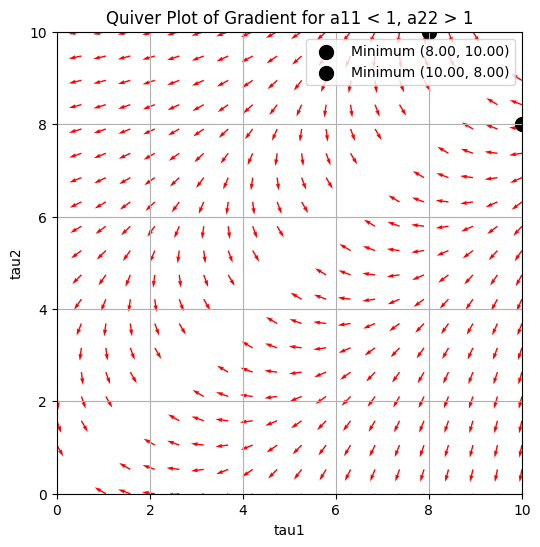

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def f(tau1, tau2, a11, a22):
    num=a11**(2 * tau1) + a11**(2 * tau2)+ a22**(2 * tau1) + a22**(2 * tau2)
    denum= a11**(2 * tau1)*a22**(2 * tau2) + a11**(2 * tau2)*a22**(2 * tau1) - 2*a11**(tau1 + tau2) * a22**(tau1 + tau2)
    

    result = np.where(np.abs(a11 - a22) < 0.1, np.nan, num / denum)  # Mask near singularity
    
    return result

# Compute gradient
def grad_f(tau1, tau2, a11, a22):
    #Tau1 component 
    tau1_term1 = 2 * a11**(tau1) * np.log(a11) * (a22**tau1 * a11**(tau1 + tau2) + a11**(2*tau2) * a22**tau2 + a22**(2*tau1 + tau2) + a22**(3*tau2))
    tau1_term2 = 2 * a22**(tau1) * np.log(a22) * (a11**tau1 * a22**(tau1 + tau2) + a22**(2*tau2) * a11**tau2 + a11**(2*tau1 + tau2) + a11**(3*tau2))

    num_tau1 = tau1_term1 - tau1_term2
    denum_tau1 = (a11**tau1 * a22**tau2 - a11**tau2 * a22**tau1)**3

    # Avoid division errors near tau1 = tau2
    with np.errstate(divide='ignore', invalid='ignore'):
        grad_tau1 = np.where(np.abs(tau1 - tau2) < 0.7, np.nan, -num_tau1 / denum_tau1)  # Mask near singularity

    #Tau2 component 
    tau2_term1 = 2 * a22**(tau2) * np.log(a22) * (a11**tau2 * a22**(tau1 + tau2) + a22**(2*tau1) * a11**tau1 + a11**(2*tau2 + tau1) + a11**(3*tau1))
    tau2_term2 = 2 * a11**(tau2) * np.log(a11) * (a22**tau2 * a11**(tau1 + tau2) + a11**(2*tau1) * a22**tau1 + a22**(2*tau2 + tau1) + a22**(3*tau1))

    num_tau2 = tau2_term1 - tau2_term2
    denum_tau2 = (a11**tau1 * a22**tau2 - a11**tau2 * a22**tau1)**3

    # Avoid division errors near tau1 = tau2
    with np.errstate(divide='ignore', invalid='ignore'):
        grad_tau2 = np.where(np.abs(tau1 - tau2) < 0.7, np.nan, -num_tau2 / denum_tau2)  # Mask near singularity
    return grad_tau1, grad_tau2

def find_minimum(tau_min, tau_max, a11, a22, resolution=50):
    best_solutions=[]
    best_value=np.inf
    
    for tau1 in range(tau_min, tau_max + 1):
        for tau2 in range(tau_min, tau_max + 1):
            if tau1==tau2:
                obj_value=np.inf
            else:
                obj_value = f(tau1, tau2, a11, a22)
            
            if obj_value < best_value:
                best_value = obj_value

    for tau1 in range(tau_min, tau_max + 1):
        for tau2 in range(tau_min, tau_max + 1):
            if tau1==tau2:
                obj_value=np.inf
            else:
                obj_value = f(tau1, tau2, a11, a22)
            
            if obj_value == best_value:
                best_solutions.append((tau1, tau2))
    return best_solutions

def create_quiver_plot(tau_min, tau_max, a11, a22):
    # Generate grid
    tau1_range = np.linspace(tau_min, tau_max, 20)
    tau2_range = np.linspace(tau_min, tau_max, 20)
    tau1, tau2 = np.meshgrid(tau1_range, tau2_range)

    # Compute gradient at each grid point
    U, V = grad_f(tau1, tau2, a11, a22)

    # Find minimum
    best_values = find_minimum(tau_min, tau_max, a11, a22)
    
    # Plot contour lines of the function
    plt.figure(figsize=(6,6))
    # contours = plt.contour(tau1, tau2, f(tau1, tau2, a11, a22), levels=20, cmap="coolwarm")
    # plt.clabel(contours, inline=True, fontsize=8)
    
    
    # Compute norm of gradient
    grad_norm = np.sqrt(U**2 + V**2)
    U/=grad_norm
    V/=grad_norm

    plt.contour(tau1, tau2, grad_norm, levels=[0.00001], colors='green', linestyles='dashed', label='Gradient Norm = 0')

    # Plot quiver plot of the gradient
    plt.quiver(tau1, tau2, U, V, color='r')

    #Plot minimum points
    for opt in best_values:
        min_tau1, min_tau2 = opt
        plt.scatter(min_tau1, min_tau2, color='black', marker='o', s=100, label=f"Minimum ({min_tau1:.2f}, {min_tau2:.2f})")


    plt.xlabel("tau1")
    plt.ylabel("tau2")
    plt.title("Quiver Plot of Gradient for a11 < 1, a22 > 1")
    plt.legend()
    plt.grid()
    plt.show()


a11, a22= 1.5, 1.7
tau_min, tau_max = 0, 10

create_quiver_plot(tau_min, tau_max, a11, a22)

### Continuous time in case C=(1 1)

C:\Users\MaryJoElBared\AppData\Local\Temp\ipykernel_33216\467342742.py:9: RuntimeWarning: divide by zero encountered in divide
  result = np.where(np.abs(a11 - a22) < 0.1, np.inf, num / denum)  # Mask near singularity
C:\Users\MaryJoElBared\AppData\Local\Temp\ipykernel_33216\467342742.py:100: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(tau1, tau2, grad_norm, levels=[0.00001], colors='green', linestyles='dashed', label='Gradient Norm = 0')


(array(-0.00010063), array(-0.0392178))
(array(-0.0392178), array(-0.00010063))


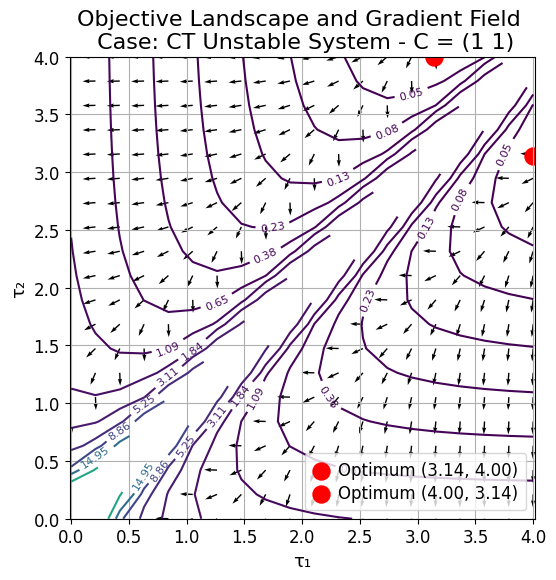

C:\Users\MaryJoElBared\AppData\Local\Temp\ipykernel_33216\467342742.py:9: RuntimeWarning: divide by zero encountered in divide
  result = np.where(np.abs(a11 - a22) < 0.1, np.inf, num / denum)  # Mask near singularity
C:\Users\MaryJoElBared\AppData\Local\Temp\ipykernel_33216\467342742.py:100: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(tau1, tau2, grad_norm, levels=[0.00001], colors='green', linestyles='dashed', label='Gradient Norm = 0')


(array(48.68241573), array(0.04602828))
(array(0.04602828), array(48.68241573))


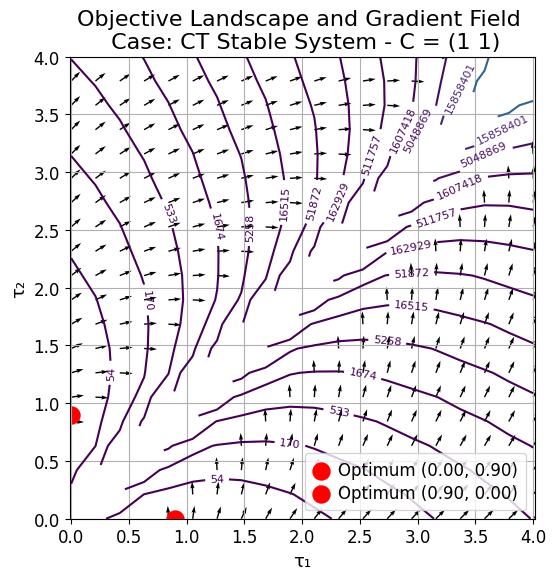

C:\Users\MaryJoElBared\AppData\Local\Temp\ipykernel_33216\467342742.py:9: RuntimeWarning: divide by zero encountered in divide
  result = np.where(np.abs(a11 - a22) < 0.1, np.inf, num / denum)  # Mask near singularity
C:\Users\MaryJoElBared\AppData\Local\Temp\ipykernel_33216\467342742.py:100: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(tau1, tau2, grad_norm, levels=[0.00001], colors='green', linestyles='dashed', label='Gradient Norm = 0')


(array(4.02024346), array(-0.01046542))
(array(-0.01046542), array(4.02024346))


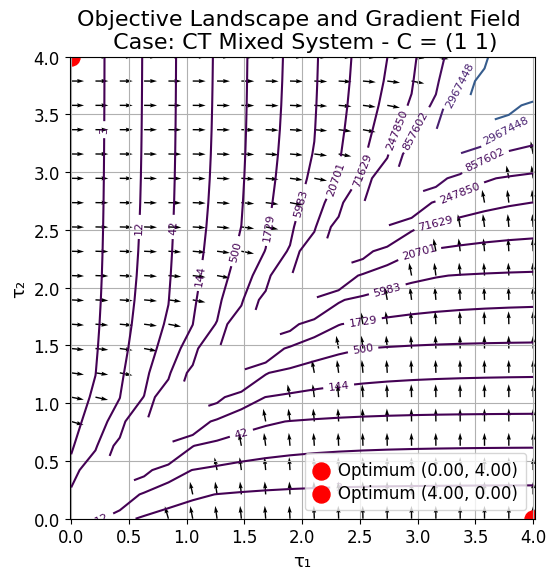

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def f(tau1, tau2, a11, a22):
    num = np.exp(a11*2 * tau1) + np.exp(a11*2 * tau2) + np.exp(a22*2 * tau1) + np.exp(a22*2 * tau2) 
    denum = (np.exp(a11 * tau1 + a22 * tau2) - np.exp(a11 * tau2 + a22 * tau1))**2
    

    result = np.where(np.abs(a11 - a22) < 0.1, np.inf, num / denum)  # Mask near singularity
    
    return result

# Compute gradient
def grad_f(tau1, tau2, a11, a22):
    #Tau1 component 
    tau1_term1 = 2 * a11 * np.exp(tau1 * a11) * (np.exp(a22*tau1 + a11*(tau1 + tau2)) + np.exp(a11*(2*tau2) + a22*tau2 )+ np.exp(a22*(2*tau1 + tau2)) + np.exp(a22*(3*tau2)))
    tau1_term2 = 2 * a22 * np.exp(tau1 * a22) * (np.exp(a11*tau1 + a22*(tau1 + tau2)) + np.exp(a22*(2*tau2) + a11*tau2) + np.exp(a11*(2*tau1 + tau2)) + np.exp(a11*(3*tau2)))

    num_tau1 = tau1_term1 - tau1_term2
    denum_tau1 = (np.exp(a11*tau1 + a22*tau2) - np.exp(a11*tau2 + a22*tau1))**3

    # Avoid division errors near tau1 = tau2
    with np.errstate(divide='ignore', invalid='ignore'):
        grad_tau1 = np.where(np.abs(tau1 - tau2) < 0.7, np.nan, -num_tau1 / denum_tau1)  # Mask near singularity

    #Tau2 component 
    tau2_term1 = 2 * a22 * np.exp(tau2 * a22) * (np.exp(a11*tau2 + a22*(tau1 + tau2)) + np.exp(a22*(2*tau1) + a11*tau1) + np.exp(a11*(2*tau2 + tau1)) + np.exp(a11*(3*tau1)))
    tau2_term2 =  2 * a11 * np.exp(tau2 * a11) * (np.exp(a22*tau2 + a11*(tau1 + tau2)) + np.exp(a11*(2*tau1) + a22*tau1 )+ np.exp(a22*(2*tau2 + tau1)) + np.exp(a22*(3*tau1)))

    num_tau2 = tau2_term1 - tau2_term2
    denum_tau2 = (np.exp(a11*tau1 + a22*tau2) - np.exp(a11*tau2 + a22*tau1))**3

    # Avoid division errors near tau1 = tau2
    with np.errstate(divide='ignore', invalid='ignore'):
        grad_tau2 = np.where(np.abs(tau1 - tau2) < 0.1, np.nan, -num_tau2 / denum_tau2)  # Mask near singularity
    return grad_tau1, grad_tau2

def find_minimum(tau_min, tau_max, a11, a22, resolution=50):
    best_solutions=[]
    best_value=np.inf
    tau1_vals= np.linspace(tau_min,tau_max,1000)
    tau2_vals= np.linspace(tau_min,tau_max,1000) 

    for tau1 in tau1_vals:
        for tau2 in tau2_vals:
            if tau1==tau2:
                obj_value=np.inf
            else:
                obj_value = f(tau1, tau2, a11, a22)
            
            if obj_value < best_value:
                best_value = obj_value

    for tau1 in tau1_vals:
        for tau2 in tau2_vals:
            if tau1==tau2:
                obj_value=np.inf
            else:
                obj_value = f(tau1, tau2, a11, a22)
            
            if obj_value == best_value:
                best_solutions.append((tau1, tau2))
    return best_solutions

def create_quiver_plot(tau_min, tau_max, a11, a22, C_label='TO FILL'):
    # Generate agrid
    tau1_range = np.linspace(tau_min, tau_max, 20)
    tau2_range = np.linspace(tau_min, tau_max, 20)
    tau1, tau2 = np.meshgrid(tau1_range, tau2_range)

    # Compute gradient at each grid point
    U, V = grad_f(tau1, tau2, a11, a22)

    # Find minimum
    best_values = find_minimum(tau_min, tau_max, a11, a22)
    
    # Plot contour lines of the function
    plt.figure(figsize=(6,6))

    Z = f(tau1, tau2, a11, a22)[np.where(f(tau1, tau2, a11, a22)!= np.inf)]

    # Avoid log(0) if Z has any zeros or very small values
    Z[Z <= 0] = np.nanmin(Z[Z > 0]) * 0.1

    # Define logarithmically spaced contour levels
    levels = np.logspace(np.log10(np.nanmin(Z)), np.log10(np.nanmax(Z)), 15)
    contours = plt.contour(tau1, tau2, f(tau1, tau2, a11, a22), levels=levels, cmap="viridis")
    plt.clabel(contours, inline=True, fontsize=8)
    
    # Compute norm of gradient
    grad_norm = np.sqrt(U**2 + V**2)
    plt.contour(tau1, tau2, grad_norm, levels=[0.00001], colors='green', linestyles='dashed', label='Gradient Norm = 0')

    # Plot quiver plot of the gradient
    plt.quiver(tau1, tau2, U/grad_norm, V/grad_norm, color='black')
    # plt.quiver(tau1, tau2, U, V, color='black')

    #Plot minimum point
    for opt in best_values:
        min_tau1, min_tau2 = opt
        print(grad_f(min_tau1, min_tau2, a11, a22))
        plt.scatter(min_tau1, min_tau2, color='red', marker='o', s=150, label=f"Optimum ({min_tau1:.2f}, {min_tau2:.2f})")


    plt.xlabel("τ₁", fontsize=13)
    plt.ylabel("τ₂", fontsize=13)
    plt.title(f"Objective Landscape and Gradient Field \n Case: {C_label}", fontsize=16)
    plt.legend(
    loc='lower right',  
    fontsize=12,         
    frameon=True,       
    handlelength=1,     
    handletextpad=0.5,  
    borderpad=0.5,      
    labelspacing=0.3    
)

    plt.tick_params(axis='both', which='major', labelsize=12)
    plt.axis('equal')
    plt.savefig('../plots/'+ C_label + '.pdf')
    plt.grid()
    plt.show()


a11, a22= 0.7, 2
tau_min, tau_max = 0, 4
create_quiver_plot(tau_min, tau_max, a11, a22, C_label="CT Unstable System - C = (1 1)")

a11, a22= - 0.7, -2
tau_min, tau_max = 0, 4
create_quiver_plot(tau_min, tau_max, a11, a22,C_label="CT Stable System - C = (1 1)")

a11, a22= 0.7, -2
tau_min, tau_max = 0, 4
create_quiver_plot(tau_min, tau_max, a11, a22, C_label="CT Mixed System - C = (1 1)")